## Group 2: Ames Housing Data Project

Here we will use the Ames Housing data provided in order to determine the sale price of a house depending on the amount of data given.  We will first need to analyze and clean the data and then determine the best machine learning models to use in order to have some regression on the data.  

First we will need to import our relevant libraries (mylearn and util are those posted by Dr. Qi) and our training data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import util
import mylearn
np.random.seed(1)

In [2]:
data = pd.read_csv('train.csv') #pre-downloaded housing data

In [3]:
data.head(5) #confirms that our data is indeed being imported correctly.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
House = data.copy()  #this gives us a new dataframe ot play with without deleting the actual data

First we'll note that there are 81 columns, we can drop the ID column as we know it is irrelevant.  Additionally, in order to categorize the variables, we'll make a histogram of the Sale Price.

In [6]:
House = House.drop('Id', axis = 1)

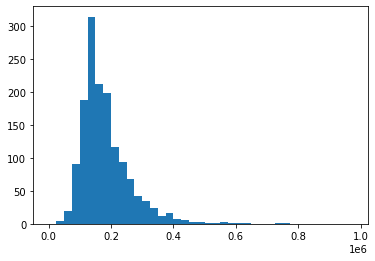

In [7]:
bins = np.arange(40)*25000
plt.hist(House['SalePrice'], bins = bins)
plt.show()

Using a bin size of \$25000, we can se a peak at about 150,000 and a long tail after that.  Therefore, in order to improve affordability decisions for whoever may be using this dataset, we will split it into five classes as below:

Class 0: Sale Price < 100,000  

Class 1: Sale Price 100,000 - 150,000  

Class 2: Sale Price 150,000 - 200,000  

Class 3: Sale Price 200,000 - 250,000  

Class 4: Sale Price > 250,000  

This allows us to generalize the classes near the mean while noting outliers so we can take them from our analysis.

In [8]:
def create_classes(dat, col = 'SalePrice'):#creates a definition that creates a class definition
    val = dat[col]
    if val < 100000: return 0
    elif val <150000: return 1
    elif val <200000: return 2
    elif val <250000: return 3
    else: return 4
    

In [9]:
House['SaleClass']= House.apply(create_classes, axis = 1)

In [10]:
House.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleClass
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,4


Next, in order to test the accuracy of our dataset (as our testing set does not have sale prices), we will randomly choose 25% of our dataset to turn into a validations dataset.  We will have to choose this randomly

In [11]:
replace_index = np.random.choice(len(House), size = int(len(House)/4), replace = False)

In [12]:
Houseval = House.iloc[replace_index]

In [13]:
Housetrain= House.drop(replace_index)

In [14]:
Houseval.shape


(365, 81)

In [15]:
Housetrain.shape

(1095, 81)